<a href="https://colab.research.google.com/github/victorandvictor/stock-predictions/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is a failry simple stock prediction model built by Victor Isingizwe, finish later

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas_datareader.data as web

In [ ]:
pip install realtime-stock

In [ ]:
#Get the stock quote 
df = web.DataReader('TSLA', data_source='yahoo', start='2010-01-01', end='2020-12-17') 
#Show the data 
print(df.head(9))

             High    Low   Open  Close      Volume  Adj Close
Date                                                         
2010-06-29  5.000  3.508  3.800  4.778  93831500.0      4.778
2010-06-30  6.084  4.660  5.158  4.766  85935500.0      4.766
2010-07-01  5.184  4.054  5.000  4.392  41094000.0      4.392
2010-07-02  4.620  3.742  4.600  3.840  25699000.0      3.840
2010-07-06  4.000  3.166  4.000  3.222  34334500.0      3.222
2010-07-07  3.326  2.996  3.280  3.160  34608500.0      3.160
2010-07-08  3.504  3.114  3.228  3.492  38557000.0      3.492
2010-07-09  3.580  3.310  3.516  3.480  20253000.0      3.480
2010-07-12  3.614  3.400  3.590  3.410  11012500.0      3.410


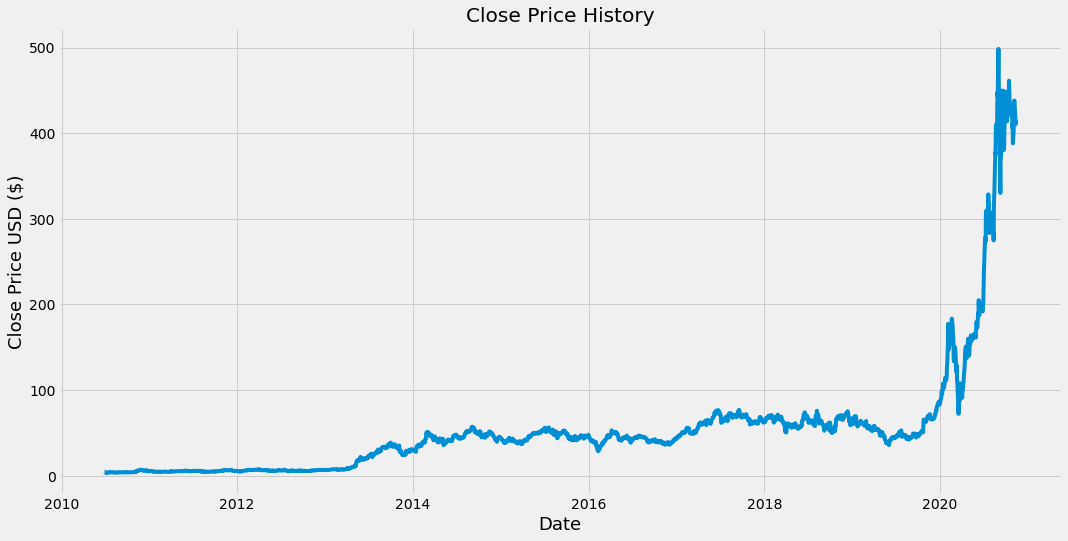

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
observations = df['Open'].values
targets = df['Close'].values
print(observations[0])
print(targets[0])

print(len(observations))
print(len(targets))

3.799999952316284
4.7779998779296875
2613
2613


In [ ]:
#let's try to predict the closing price based on the opening price
observations_train, observations_test, targets_train, targets_test = train_test_split(observations, targets,
                                                                                      test_size = 0.3, random_state = 42)

#reshaping the data
observations_test, observations_train = observations_test.reshape(-1, 1), observations_train.reshape(-1, 1)
targets_train, targets_test = targets_train.reshape(-1, 1), targets_test.reshape(-1, 1)

#initiating the linnaer regression
reg_all = LinearRegression().fit(observations_train, targets_train)

#inititating predictions
targets_pred = reg_all.predict(observations_test)

#check how well the model is working :
random_volume = np.array([93831500.0]).reshape(1, -1)
random_pred = reg_all.predict(random_volume)
print(random_pred)

#score of the model on a 100%
print(reg_all.score(observations_test, targets_test)*100)


[[94139987.41762917]]
99.84198358191196


In [ ]:
#cross calidate the data using 5 splits in this case and see how well the model is doing
cv_results = cross_val_score(reg_all, observations_train, targets_train, cv=10)
print(cv_results)

[0.99586457 0.99817054 0.99794291 0.99780506 0.99857659 0.99896665
 0.99736986 0.9966667  0.99851997 0.99545414]


In [ ]:
#very good performance and as we're working in only two dimensions, this could be the result of overfitting 
#penelizing too large coefficitns, we're doing regulization here : Ridge regression and Lasso regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.3, normalize=True)
ridge.fit(observations_train, targets_train)
ridge_pred = ridge.predict(observations_test)
ridge.score(observations_test, targets_test)

0.9510779200521674

In [ ]:
#when doing predictions in a multidimentional space, with Lasso you can choose the more import features  
#also able to shrink the coefficients which are less important to 0. visualizing this is important. it shows which 
#features is most important in making predictions

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.3, normalize=True)
lasso.fit(observations_train, targets_train)

lasso_coef = lasso.coef_
print(lasso_coef)

lasso_pred = lasso.predict(observations_test)
lasso.score(observations_test, targets_test)


[0.82647752]


0.9721897273669725